# 模拟结果可视化

In [14]:
import os, sys
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'nature', 'no-latex', 'notebook'])

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

extract_path = os.path.join(this_path, '../../data/extract')

import warnings
warnings.filterwarnings('ignore')

from plot_func import plot3D


## 1. p+和pi-

In [15]:
ppi_files = os.path.join(extract_path, '*single_p*/*CsI*.csv')

ppi_data = []
for ppi_file in glob(ppi_files):
    ppi_data.append(pd.read_csv(ppi_file, index_col=0))

ppi_data = pd.concat(ppi_data)

ppi_data['efficiency_err'] = (ppi_data.efficiency * (1-ppi_data.efficiency) / ppi_data['all']) ** 0.5 
ppi_data['1-efficiency'] = 1 - ppi_data.efficiency

ppi_data.columns = [i.replace('scale', 'resolution') for i in ppi_data.columns]

ppi_data

particle material  thickness      p  cos_theta     p_loc  p_loc_err  \
0     single_p+      CsI          1  0.325      0.025 -0.028596   0.000183   
1     single_p+      CsI          1  0.325      0.075 -0.028723   0.000164   
2     single_p+      CsI          1  0.325      0.125 -0.028561   0.000153   
3     single_p+      CsI          1  0.325      0.175 -0.029324   0.000185   
4     single_p+      CsI          1  0.325      0.225 -0.029359   0.000175   
..          ...      ...        ...    ...        ...       ...        ...   
391  single_pi-      CsI          1  1.175      0.675  0.000487   0.000159   
392  single_pi-      CsI          1  1.175      0.725  0.000950   0.000168   
393  single_pi-      CsI          1  1.175      0.775  0.000751   0.000146   
394  single_pi-      CsI          1  1.175      0.825  0.000546   0.000168   
395  single_pi-      CsI          1  1.175      0.875  0.000692   0.000165   

     p_resolution  p_resolution_err  theta_loc  theta_loc_err  \
0        0.005236          0.000153  -0.000919       0.000864   
1        0.005129          0.000137   0.000374       0.001034   
2        0.005175          0.000128   0.000068       0.000814   
3        0.005535          0.000155   0.000522       0.000909   
4        0.005428          0.000147   0.000649       0.000868   
..            ...               ...        ...            ...   
391      0.006409          0.000132   0.000247       0.000072   
392      0.005828          0.000139  -0.000037       0.000081   
393      0.006086          0.000120   0.000179       0.000080   
394      0.005958          0.000138  -0.000066       0.000085   
395      0.007273          0.000135   0.000110       0.000088   

     theta_resolution  theta_resolution_err  efficiency   valid     all  \
0            0.032338              0.000722    0.849364  2605.0  3067.0   
1            0.034342              0.000867    0.852960  2680.0  3142.0   
2            0.032309              0.000681    0.845880  2618.0  3095.0   
3            0.033547              0.000760    0.848168  2592.0  3056.0   
4            0.033012              0.000725    0.836138  2633.0  3149.0   
..                ...                   ...         ...     ...     ...   
391          0.003622              0.000059    0.970403  2459.0  2534.0   
392          0.003651              0.000066    0.968889  2398.0  2475.0   
393          0.003779              0.000065    0.968576  2435.0  2514.0   
394          0.003928              0.000069    0.957725  2492.0  2602.0   
395          0.004147              0.000072    0.940365  2318.0  2465.0   

     delta_angle_one_sigma  efficiency_err  1-efficiency  
0                 0.051925        0.006459      0.150636  
1                 0.052415        0.006318      0.147040  
2                 0.051936        0.006490      0.154120  
3                 0.052326        0.006492      0.151832  
4                 0.052460        0.006596      0.163862  
..                     ...             ...           ...  
391               0.005472        0.003367      0.029597  
392               0.005645        0.003490      0.031111  
393               0.005740        0.003479      0.031424  
394               0.006181        0.003945      0.042275  
395               0.006517        0.004770      0.059635  

[3276 rows x 19 columns]

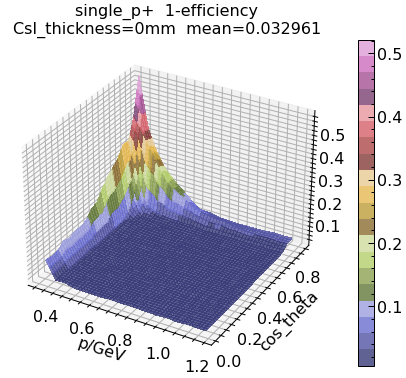

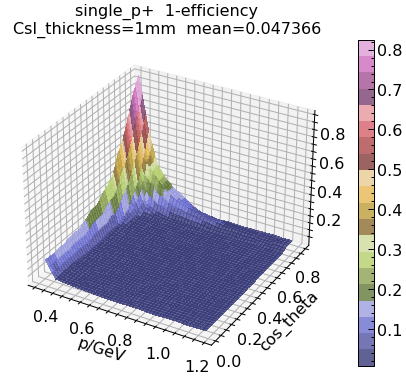

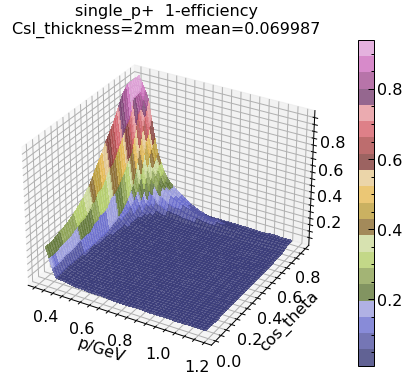

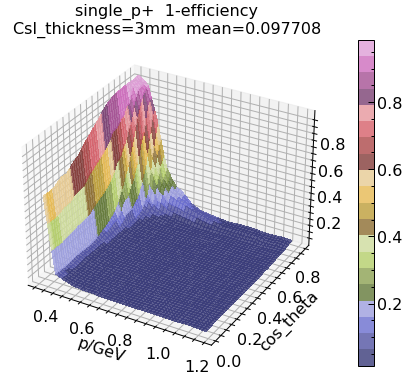

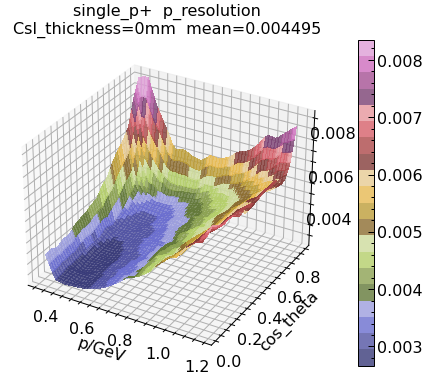

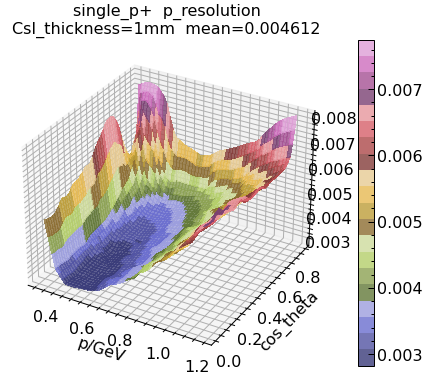

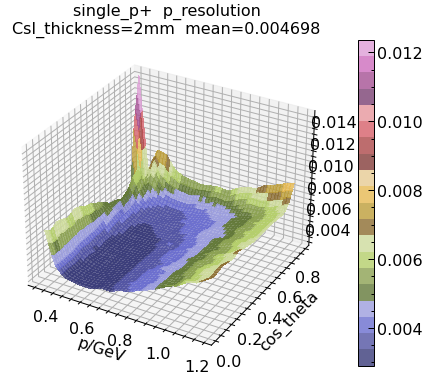

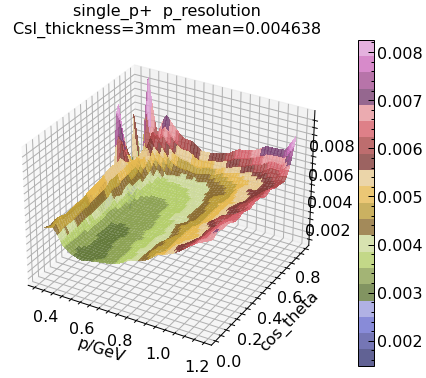

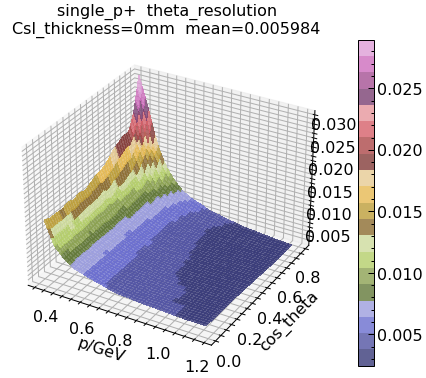

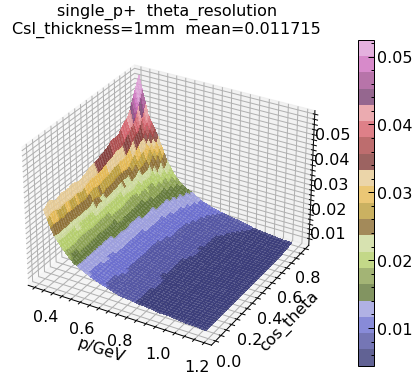

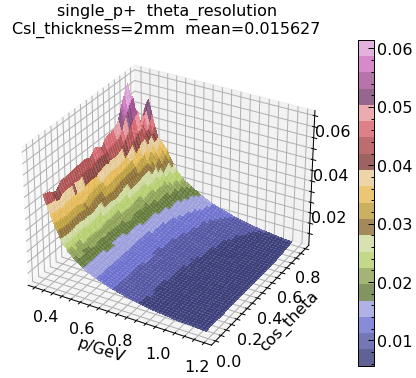

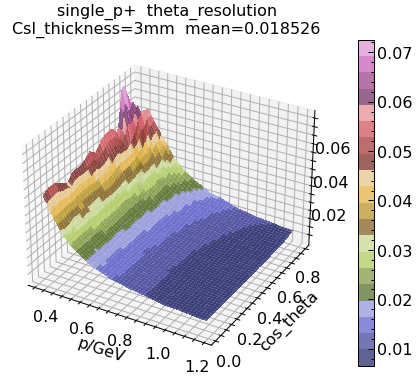

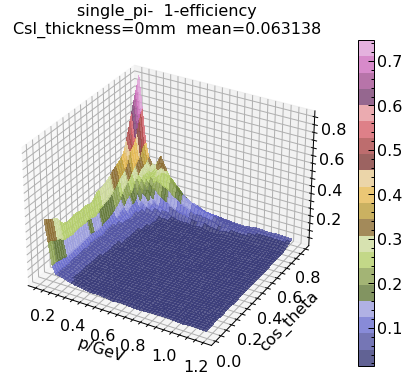

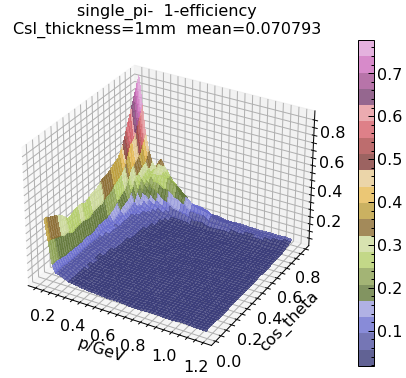

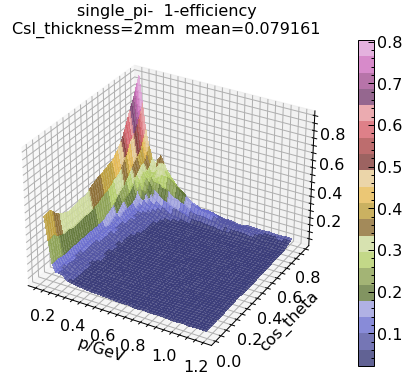

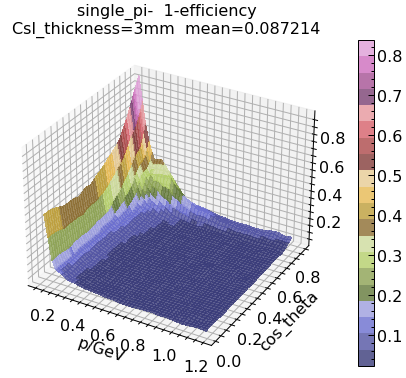

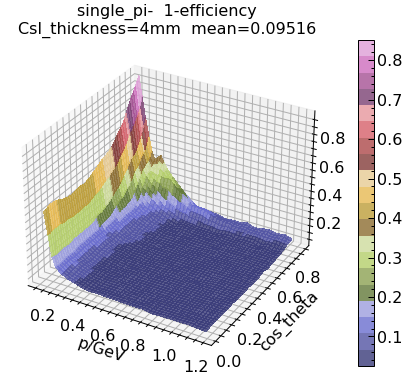

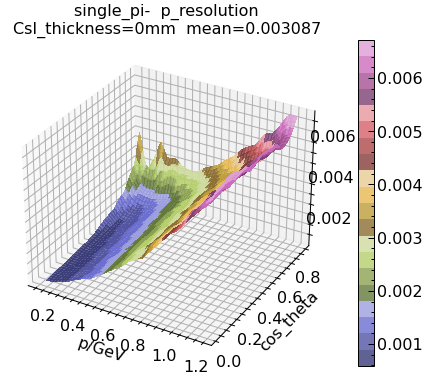

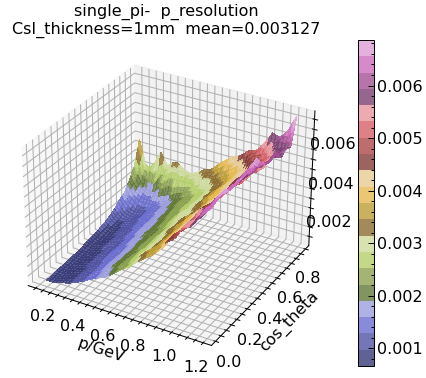

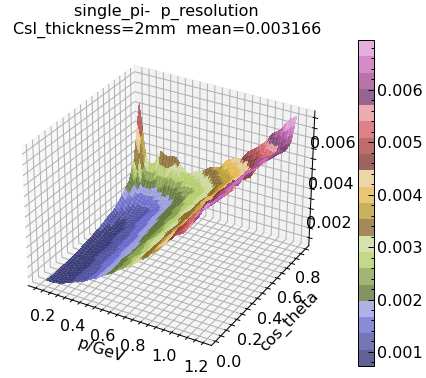

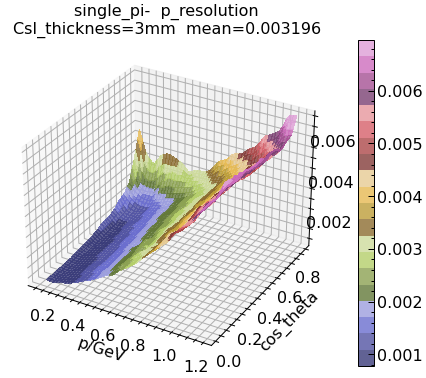

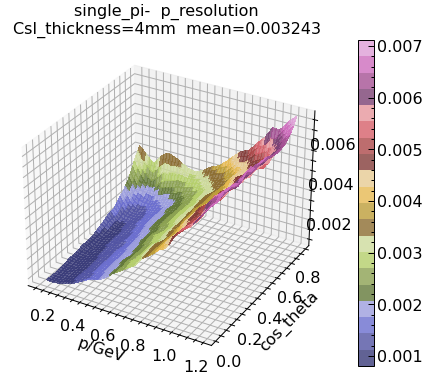

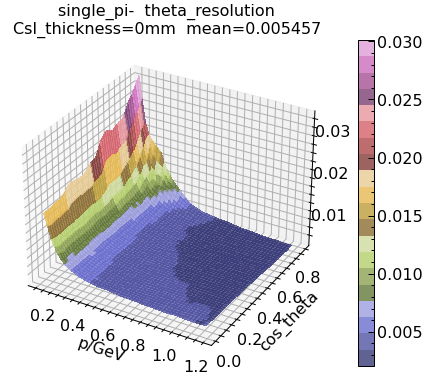

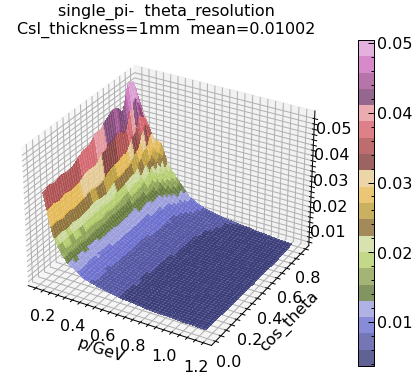

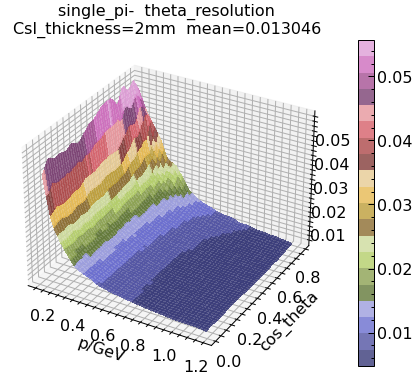

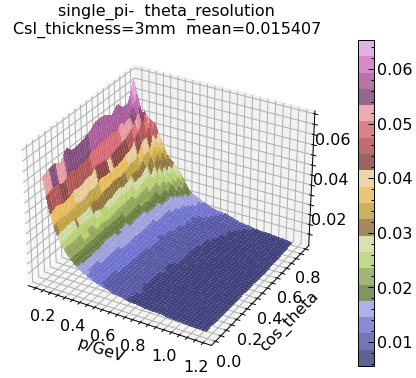

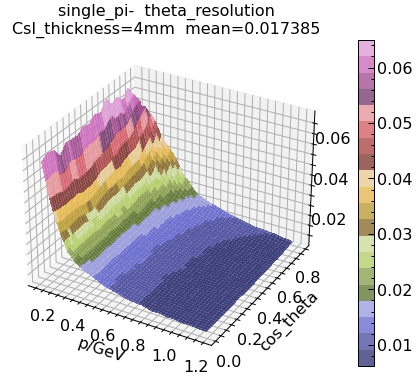

In [18]:
for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_particle = ppi_data[
        (ppi_data.particle==particle)
    ]
    for key in ['1-efficiency', 'p_resolution', 'theta_resolution']:
        for thickness in np.sort(ppi_csi_data_particle.thickness.unique()):
            ppi_csi_data_particle_thickness = ppi_csi_data_particle[
            (ppi_csi_data_particle.thickness==thickness)
        ]       
            tmp = ppi_csi_data_particle_thickness[['p', 'cos_theta', key]]
            mean_value = (ppi_csi_data_particle_thickness[key] * ppi_csi_data_particle_thickness['all'] / ppi_csi_data_particle_thickness['all'].sum()).sum()
            title = '{}  {}\nCsI_thickness={}mm  mean={}'.format(particle, key, thickness, round(mean_value, 6))
            xlabel, ylabel = 'p/GeV', 'cos_theta'
            plot3D(tmp, title=title, xlabel=xlabel, ylabel=ylabel)
            